In [2]:
#CONCLUSIONS
#KPI 1: Measure the amount of rides on different weather conditions and
#  define reccomendations to fit pricing matrices in accordance with weather patterns.
    #SMART - A specific, measurable, and attainable goal for a sales team 
    # to increase revenue in a particular region by a certain percentage within a specific timeframe 
        #S measure "total rides" column and how the data set relates to the feature: climate, and alternately other significant features like temperature etc.
            #in EDA: in weather x, total rides are low, how to increase for specific section
        #M measure how many rides are taken on a recommended (likely warm, temperate, dry) day, see if there are any patterns
            #What ratio of total rides on a warm vs cold, and trying to give initive raise total rides on cold days

        #A measure weekly to benchmark initial observed patterns (could extrapolate data to further enhance predictions)
            #what patterns would be desired? what are the desired increase be, what do we change if we arent reaching it?
        #R more rides translate to more bike usage and therefore less congestion/elivating city congestion pressure
            
        #T measure 6 month period (enough for at least 1 season switch) and design machine learning algorithm,
            #to predict how well we can estimate total rides on a given day (with a specific climate) 

#KPI 2: Measure the impact of holidays on the usage of casual users
#  more casual users translates into more app exposure/more long term subscription, steady customers 
# - promotions on holidays/weekends could be a easy way to gain more app users
    #SMART
        #S:By investigating historical data we can gain an overview of key holidays (4th of July?) 
        # where casual member usage spikes the most
        # M: measure difference between climate wise identical days but then holiday vs / no holiday, investigate for correlations (boxplot)
        #A: implimenting discounts or observing user numbers on past & future holiday day data 
        # (and maybe usage +/- 2 days before and after holiday) 
        # would provide insight into the trends at hand and help evaluate if further investigation is necessary
        #R By targeting days that have spikes in new user interactions (casual users) - 
            #one could impliment:
        #  targeted discounts, free rides, referral promotions, give aways, sales, merch, 
        # targeted advertisement and data collection 
        # To enhance potential sales and stimulate long term user engagement. Increase in profit could translate to a decrease in prices for customers long term, improving the "transport" deal




In [3]:
# importing neccessery libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import holidays 

In [4]:
#MACHINE LEARNING IMPORTS

#DATA PROCESSING
#Encoding
from sklearn.preprocessing import LabelEncoder
#Second label encoder we are trying later
from sklearn.preprocessing import OneHotEncoder

#splitting data
from sklearn.model_selection import train_test_split

#Normalizing after split, as intended to prevent data leakage
from sklearn.preprocessing import MinMaxScaler

#MACHINE LEARNING MODESL
  #Random Forest 
from sklearn.ensemble import RandomForestClassifier
  #Logistic reg
from sklearn.linear_model import LogisticRegression
  #Decision tree classifier

from sklearn.tree import DecisionTreeClassifier


#Model eval
from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

#Classification reports
from sklearn.metrics import accuracy_score, classification_report

#Kappa score
from sklearn.metrics import cohen_kappa_score

#Confusion matrix
from sklearn.metrics import confusion_matrix

#cross val scoring 
from sklearn.model_selection import cross_val_score

In [5]:

#POSSIBLE PLOTS:
#x percentage of casual users vs members on weekend vs week days
#x total members on weather code 0 (no clouds) vs total members weather code 65 (raining, heavy at time of ob.) 

In [6]:
df_daily = pd.read_csv("Data_raw\CBS_2021-2023_Daily_Weather.csv",sep = ",")

df_daily.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Leon\AppData\Local\Temp\ipykernel_8516\1753049123.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_daily = pd.read_csv("Data_raw\CBS_2021-2023_Daily_Weather.csv",sep = ",")


,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [7]:
df_daily.dtypes
df_daily.columns = df_daily.columns.str.lower()

In [8]:
# Checking for NULLs in the data
df_daily.isnull().sum()
if_dupped = df_daily.duplicated()

#No dupliates
for elements in if_dupped:
    if elements == "True":
        print(elements)
    else:
        pass
    

In [9]:
#has no null data:
#casual                            0
#date                              0
#member                            0
#total_rides                       0
#apparent_temperature_mean (°c)    0
#temperature_2m_mean (°c)          0
#weathercode (wmo code)            0
#windspeed_10m_max (km/h)          0
#climate                           0
#weekday                           0
#weekday_name                      0


In [10]:
df_daily.head(5)

,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


In [11]:
df_daily["climate"] = df_daily["apparent_temperature_mean (°c)"].apply(lambda value: "cold"
                                                                if value <= 5 else "temperate"
                                                                if value <= 15 else "warm"
                                                                ) 

df_daily["climate"] = pd.Categorical(df_daily["climate"], categories = ["cold","temperate","warm"])


df_daily.dtypes

casual                               int64
date                                object
member                               int64
total_rides                          int64
apparent_temperature_mean (°c)     float64
temperature_2m_mean (°c)           float64
weathercode (wmo code)               int64
windspeed_10m_max (km/h)           float64
climate                           category
dtype: object

In [12]:
df_daily['date'] = pd.to_datetime(df_daily['date'])
df_daily['weathercode (wmo code)'] = df_daily['weathercode (wmo code)'].astype('category')


In [13]:
df_daily.dtypes

casual                                     int64
date                              datetime64[ns]
member                                     int64
total_rides                                int64
apparent_temperature_mean (°c)           float64
temperature_2m_mean (°c)                 float64
weathercode (wmo code)                  category
windspeed_10m_max (km/h)                 float64
climate                                 category
dtype: object

In [14]:
# extract weekdays using dt.dayofweek
df_daily['weekday'] = df_daily['date'].dt.dayofweek



In [15]:
# extract weekdays using dt.day_name()
df_daily['weekday_name'] = df_daily['date'].dt.day_name()
df_daily['is_weekend'] = df_daily["date"].dt.weekday >= 5

In [16]:


df_daily.head(5)

,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,weekday,weekday_name,is_weekend
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,cold,4,Friday,False
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,cold,5,Saturday,True
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,cold,6,Sunday,True
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,cold,0,Monday,False
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,cold,1,Tuesday,False


In [17]:
uniques = df_daily["weathercode (wmo code)"].unique()

#print(len(uniques))
indices = np.argsort(uniques)
ordered_arr = uniques[indices]

for elements in ordered_arr:
    print(elements)

code_map = {
0:"Cloud development not observed or not observable",                  
1:"Cloud generally dissolving or becoming less developed",                  
2:"State of sky on the whole unchanged",                                
3:"Clouds generally forming or developing",
51:"Drizzle, not freezing, continuous, slight at time of ob.",
53:"Drizzle, not freezing, continuous, moderate at time of ob.",                           
55:"Drizzle, not freezing, continuous, heavy at time of ob.",
61:"Rain, not freezing, continuous, slight at time of ob.",                                  
63:"Rain, not freezing, continuous, moderate at time of ob.",                
65:"Rain, not freezing, continuous, heavy at time of ob.",
71:"Continuous fall of snowflakes, slight at time of ob.",
73:"Continuous fall of snowflakes, moderate at time of ob.",
75:"Continuous fall of snowflakes, heavy at time of ob."}

weather_type_map = {
0:"Sunny",                  
1:"Sunny",                  
2:"Sunny",                                
3:"Cloudy",
51:"Drizzle",
53:"Drizzle",                           
55:"Drizzle",
61:"Rain",                                  
63:"Rain",                
65:"Rain",
71:"Snow",
73:"Snow",
75:"Snow"}

df_daily['weather_description'] = df_daily['weathercode (wmo code)'].map(code_map)


df_daily["weather_type"] = df_daily['weathercode (wmo code)'].map(weather_type_map)
df_daily.head()


0
1
2
3
51
53
55
61
63
65
71
73
75


,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,weekday,weekday_name,is_weekend,weather_description,weather_type
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,cold,4,Friday,False,"Rain, not freezing, continuous, moderate at ti...",Rain
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,cold,5,Saturday,True,"Rain, not freezing, continuous, slight at time...",Rain
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,cold,6,Sunday,True,"Rain, not freezing, continuous, moderate at ti...",Rain
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,cold,0,Monday,False,Clouds generally forming or developing,Cloudy
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,cold,1,Tuesday,False,"Drizzle, not freezing, continuous, slight at t...",Drizzle


In [18]:
#Add column for weekday 
df_daily['date'] = pd.to_datetime(df_daily['date'])
df_daily['weekday_name'] = df_daily['date'].dt.day_name()

In [19]:
us_holidays = holidays.US()
df_daily['is_holiday'] = df_daily['date'].map(lambda x: x in us_holidays)

In [20]:

df_daily["percentage_members_vs_casuals(%)"] = round((df_daily["member"]/(df_daily["casual"] + df_daily["member"]))*100,2)

df_daily.head(5)




,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,weekday,weekday_name,is_weekend,weather_description,weather_type,is_holiday,percentage_members_vs_casuals(%)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,cold,4,Friday,False,"Rain, not freezing, continuous, moderate at ti...",Rain,True,61.39
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,cold,5,Saturday,True,"Rain, not freezing, continuous, slight at time...",Rain,False,49.74
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,cold,6,Sunday,True,"Rain, not freezing, continuous, moderate at ti...",Rain,False,69.59
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,cold,0,Monday,False,Clouds generally forming or developing,Cloudy,False,69.57
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,cold,1,Tuesday,False,"Drizzle, not freezing, continuous, slight at t...",Drizzle,False,65.47


In [21]:
df_daily['season'] = df_daily['date'].dt.month.map({1: 'winter',
                                                    2: 'spring', 3: 'spring', 
                                                    4: 'summer',5: 'summer',6: 'summer', 7: 'summer',
                                                    8: 'autumn',9: 'autumn', 
                                                    10: 'winter',11: 'winter',12: 'winter'})

In [22]:
#Fresh Breeze (Beaufort 5): Wind speed of 19-24 mph (30-38 km/h). 
# This is considered a moderate wind, and you may notice large branches and small trees in leaf beginning to sway.
#Strong Breeze (Beaufort 6): Wind speed of 25-31 mph (40-50 km/h). 
# At this level, whole trees in motion, and whistling sounds are heard in overhead or nearby power and telephone lines.
#Near Gale (Beaufort 7): Wind speed of 32-38 mph (51-61 km/h). 
# This is considered a strong wind, and you may notice inconvenience when walking against the wind.
#Gale (Beaufort 8): Wind speed of 39-46 mph (62-74 km/h). 
# At this level, wind breaks twigs and small branches, and generally impedes walking.
wind_dict = {}

df_daily["windiness"] = df_daily["windspeed_10m_max (km/h)"].apply(lambda value: "no_wind"
                                                                if value <= 30 else "fresh_breeze"
                                                                if value <= 38 else "strong_breeze"
                                                                if value <= 51 else "near_gale"
                                                                if value <= 62 else "gale"
                                                                ) 

df_daily["windiness"] = pd.Categorical(df_daily["windiness"], categories = ["no_wind","fresh_breeze","strong_breeze",
                                                                        "near_gale","gale"])


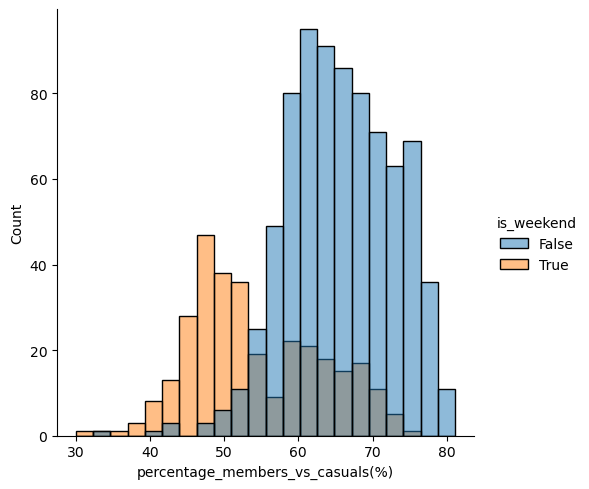

In [23]:
#percentage of casual users vs members on weekend vs week days
#sns.histplot(data=df_daily, x="percentage_members_vs_casuals(%)", hue="weekday_name")
sns.displot(data=df_daily, x="percentage_members_vs_casuals(%)", hue="is_weekend")


<Axes: xlabel='percentage_members_vs_casuals(%)', ylabel='Density'>

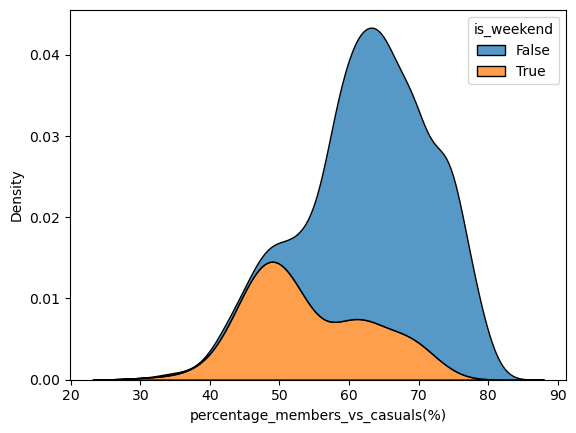

In [24]:
#sns.scatterplot(data=df_daily, x="weekday_name", y="percentage_members_vs_casuals(%)", hue="weekday_name")
sns.kdeplot(data=df_daily, x ="percentage_members_vs_casuals(%)", hue="is_weekend", multiple="stack")


<Axes: xlabel='percentage_members_vs_casuals(%)', ylabel='Density'>

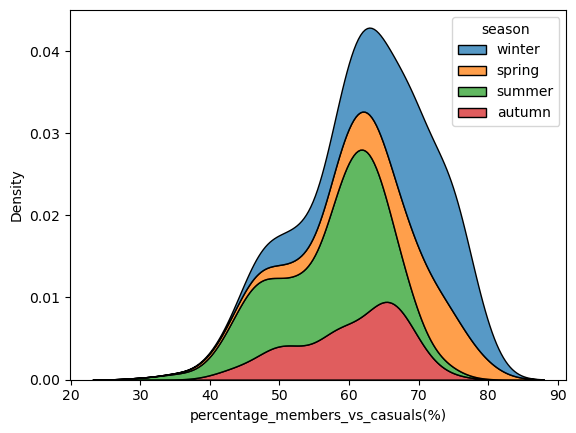

In [25]:

sns.kdeplot(data=df_daily, x ="percentage_members_vs_casuals(%)", hue="season", multiple="stack")


In [26]:
# total members on weekend vs week days DOESNT WORK, 5 vs 2 days isnt a good comparison, only ratio is 


In [27]:
df_daily.head(2)

,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,weekday,weekday_name,is_weekend,weather_description,weather_type,is_holiday,percentage_members_vs_casuals(%),season,windiness
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,cold,4,Friday,False,"Rain, not freezing, continuous, moderate at ti...",Rain,True,61.39,winter,no_wind
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,cold,5,Saturday,True,"Rain, not freezing, continuous, slight at time...",Rain,False,49.74,winter,no_wind


<Axes: xlabel='is_weekend', ylabel='percentage_members_vs_casuals(%)'>

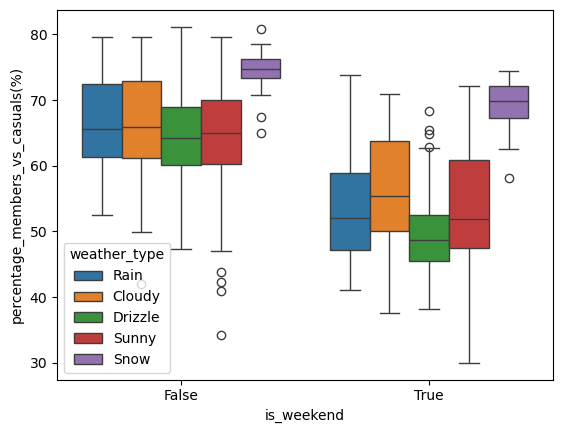

In [28]:
#percentage rides on different weathers
sns.boxplot(data=df_daily, x="is_weekend", y="percentage_members_vs_casuals(%)", hue="weather_type")

<Axes: xlabel='is_holiday', ylabel='percentage_members_vs_casuals(%)'>

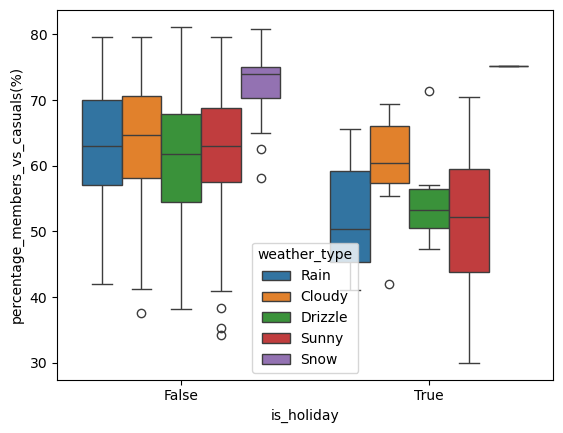

In [29]:
sns.boxplot(data=df_daily, x="is_holiday", y="percentage_members_vs_casuals(%)", hue="weather_type")

<Axes: xlabel='weather_type', ylabel='total_rides'>

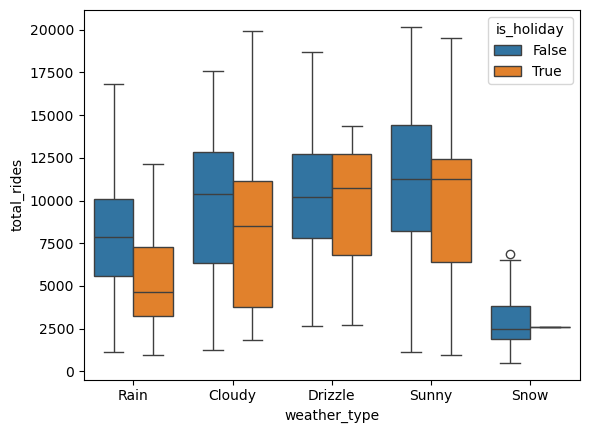

In [30]:
sns.boxplot(data=df_daily, x="weather_type", y="total_rides", hue="is_holiday")

In [31]:
df_daily.head(3)

,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,weekday,weekday_name,is_weekend,weather_description,weather_type,is_holiday,percentage_members_vs_casuals(%),season,windiness
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,cold,4,Friday,False,"Rain, not freezing, continuous, moderate at ti...",Rain,True,61.39,winter,no_wind
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,cold,5,Saturday,True,"Rain, not freezing, continuous, slight at time...",Rain,False,49.74,winter,no_wind
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,cold,6,Sunday,True,"Rain, not freezing, continuous, moderate at ti...",Rain,False,69.59,winter,no_wind


<Axes: xlabel='windiness', ylabel='total_rides'>

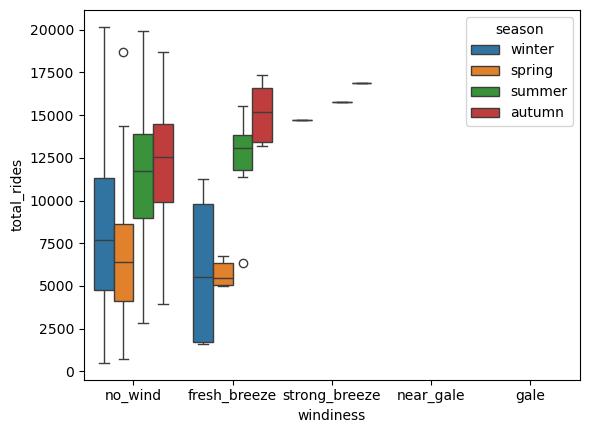

In [32]:
sns.boxplot(data=df_daily, x="windiness", y="total_rides", hue="season")

<Axes: xlabel='weather_type', ylabel='percentage_members_vs_casuals(%)'>

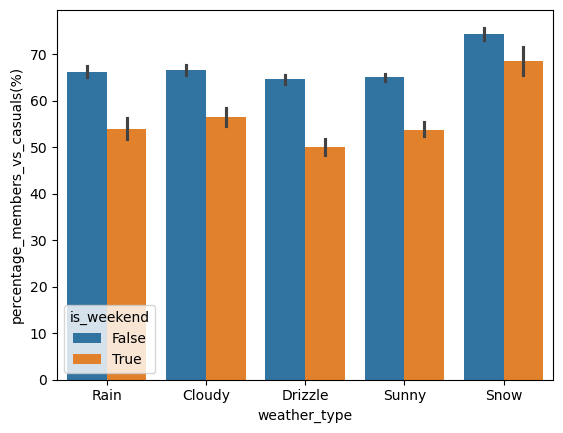

In [33]:
#Observation: you consistently have a higher ratio of member users during week days, no matter the weather

sns.barplot(data=df_daily, x="weather_type",y="percentage_members_vs_casuals(%)", hue="is_weekend")

<Axes: xlabel='weather_type', ylabel='total_rides'>

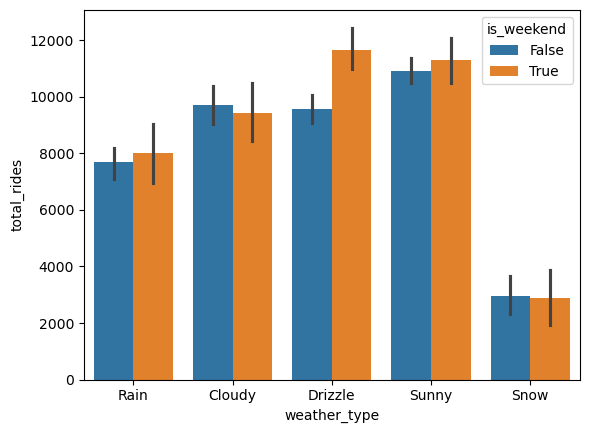

In [34]:
#Observation: most rides on weekends 
sns.barplot(data=df_daily, x="weather_type",y="total_rides", hue="is_weekend")

In [35]:
df_daily.head(2)


,casual,date,member,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,weekday,weekday_name,is_weekend,weather_description,weather_type,is_holiday,percentage_members_vs_casuals(%),season,windiness
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,cold,4,Friday,False,"Rain, not freezing, continuous, moderate at ti...",Rain,True,61.39,winter,no_wind
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,cold,5,Saturday,True,"Rain, not freezing, continuous, slight at time...",Rain,False,49.74,winter,no_wind


In [36]:
#df_daily['climate'] = df_daily['climate'].replace({'cold': 0, 'temperate': 1, 'warm': 2})
#df_daily['is_holiday'] = df_daily['is_holiday'].astype(int)
#df_daily['is_weekend'] = df_daily['is_weekend'].astype(int)
no_strings = df_daily.drop(columns=["date","season","windiness","weather_type","weather_description","weekday_name"
                                    ,"casual","member","weekday"])


#from sklearn.preprocessing import OneHotEncoder

# Assuming 'category' is a categorical column
#ohe = OneHotEncoder(handle_unknown='ignore')
#ohe.fit(no_strings[["is_weekend"]])
#no_strings["is_weekend"] = ohe.transform(no_strings[["is_weekend"]])
#ohe.fit(no_strings[["is_holiday"]])
#no_strings["is_holiday"] = ohe.transform(no_strings[["is_holiday"]])

le = LabelEncoder()

# Fit the LabelEncoder to the data
#le.fit(["low","medium","high"])
le.fit(["cold","temperate","warm"])

le.classes_

# Transform the data into numerical labels
no_strings["climate"] = le.transform(no_strings["climate"])

le.fit(["True","False"])

le.classes_

# Transform the data into numerical labels
no_strings["is_holiday"] = le.transform(no_strings["is_holiday"])

# Transform the data into numerical labels
no_strings["is_weekend"] = le.transform(no_strings["is_weekend"])

In [37]:
no_strings.head(3)

,total_rides,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,is_weekend,is_holiday,percentage_members_vs_casuals(%)
0,961,-0.9,2.3,63,10.6,0,0,1,61.39
1,5718,4.8,7.6,61,19.1,0,1,0,49.74
2,1628,0.9,3.9,63,13.0,0,1,0,69.59


In [38]:
#Prepping dataframe for correlation map and machine learning
                            #variables that will give away the trend to the AI
                                #"casual"
                                #"member"
                                #"total_rides" ?

# specify the column to move 
col_to_move = 'total_rides'

# pop the column from its original position
moved_col = no_strings.pop(col_to_move)

# insert the column at the last position (default is -1, which means the end)
no_strings.insert(len(no_strings.columns), col_to_move, moved_col)

no_strings.head(2)


,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,is_weekend,is_holiday,percentage_members_vs_casuals(%),total_rides
0,-0.9,2.3,63,10.6,0,0,1,61.39,961
1,4.8,7.6,61,19.1,0,1,0,49.74,5718


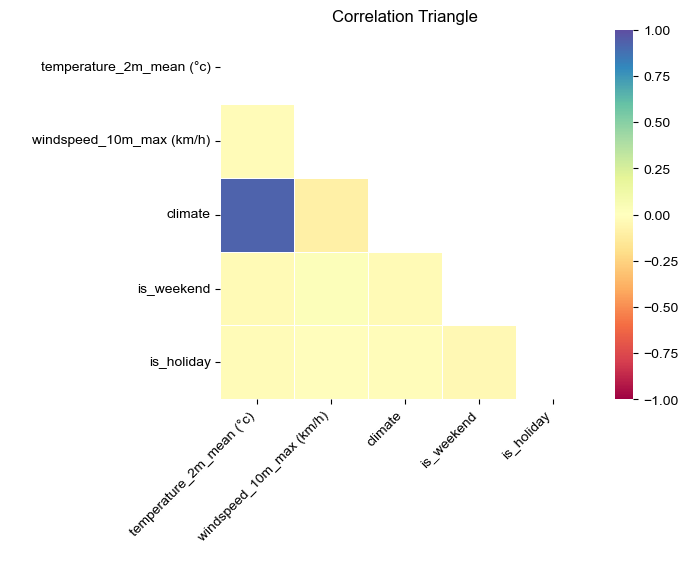

In [39]:

###Heat map for all data points to evaluate correlations 
for_heatmap = no_strings.drop(["total_rides","percentage_members_vs_casuals(%)","apparent_temperature_mean (°c)","weathercode (wmo code)"],axis=1,inplace=False)
#correlation map
corrmap = for_heatmap.corr()
# Generate a mask for the upper triangular part
mask = np.triu(np.ones_like(corrmap, dtype=bool))

#plot heatmap triangle 
ax = sns.heatmap(
    corrmap, mask = mask,
    vmin=-1, vmax=1, center=0,
    cmap="Spectral",
    square=True,
    linewidths=0.5
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title("Correlation Triangle")
sns.set(rc = {'figure.figsize':(15,8)})

In [40]:
no_strings.head(2)

,apparent_temperature_mean (°c),temperature_2m_mean (°c),weathercode (wmo code),windspeed_10m_max (km/h),climate,is_weekend,is_holiday,percentage_members_vs_casuals(%),total_rides
0,-0.9,2.3,63,10.6,0,0,1,61.39,961
1,4.8,7.6,61,19.1,0,1,0,49.74,5718


In [41]:
#Make a dataframe for linear Reg

df_linear = no_strings[["total_rides","apparent_temperature_mean (°c)","climate"]]

total_rides = df_linear["total_rides"]
ap_temp = df_linear["apparent_temperature_mean (°c)"]
climate = df_linear["climate"]

print(total_rides.shape)
print(ap_temp.shape)
print(climate.shape)



(1095,)
(1095,)
(1095,)


In [42]:
# Reshape the dfs to have value for the column instead of a null.

total_rides = total_rides.values.reshape(-1, 1)
ap_temp = ap_temp.values.reshape(-1, 1)
climate = climate.values.reshape(-1, 1)

print(total_rides.shape)
print(ap_temp.shape)
print(climate.shape)


(1095, 1)
(1095, 1)
(1095, 1)


In [43]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


In [44]:
ap_temp_train, climate_test, climate_train, ap_temp_test = train_test_split(ap_temp, climate, test_size=0.2, random_state=0)

In [45]:
# Train model to predict the climate type based on temperature

reg_total_rides = linear_model.LinearRegression()
reg_total_rides.fit(ap_temp_train, climate_train)

LinearRegression()

In [46]:
# Predict values using test data.
reg_score = (reg_total_rides.score(climate_test, ap_temp_test) * 100)
print("The accuracy of the ML model based on prediciting the climate based on temperature is:", reg_score , "%")


The accuracy of the ML model based on prediciting the climate based on temperature is: 84.65391419215852 %


In [47]:
# Enter sqft area of the house you want to predict the price for.

temp_pred = 25.0

pred_1 = reg_total_rides.predict([[temp_pred]])
#0 = cold
#1 = temperate
#2 = warm

print(f"On a day with a temperature of {temp_pred} °C  you are likely to have a climate type of: {pred_1} and is {reg_score}% accurate" )


On a day with a temperature of 25.0 °C  you are likely to have a climate type of: [[1.94414202]] and is 84.65391419215852% accurate


In [48]:
#Split data set
###Can do 1 ML model for percentage_members, and another for Linear Reg for total rides!!


#ML for total rides



#["apparent_temperature_mean (°c)","temperature_2m_mean (°c)","windspeed_10m_max (km/h)","percentage_members_vs_casuals(%)"]


#last drops, we are trying to predict total rides 
#before_X = no_strings.drop(["total_rides","weathercode (wmo code)"],axis=1,inplace=False) #dropping total_rides

#before_X = no_strings.drop(["total_rides","percentage_members_vs_casuals(%)","apparent_temperature_mean (°c)","weathercode (wmo code)"],axis=1,inplace=False) #dropping total_rides
before_X = no_strings["climate"].to_frame()

print(before_X.isnull().sum())
X = before_X # --> the features we will keep to build our model
y = no_strings["total_rides"].to_frame() # --> what you're trying to predict

#X.info()
#y.info()
# Example:

#print(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
#X_test.describe()

climate    0
dtype: int64


In [62]:
X_train_temp.shape

(876, 1)

Coefficients: 
 [[2921.92804213]]
[[12310.14288596]
 [12310.14288596]
 [ 9388.21484383]
 [12310.14288596]
 [12310.14288596]
 [ 9388.21484383]
 [12310.14288596]
 [12310.14288596]
 [ 6466.28680171]
 [ 6466.28680171]
 [12310.14288596]
 [12310.14288596]
 [ 9388.21484383]
 [12310.14288596]
 [12310.14288596]
 [12310.14288596]
 [12310.14288596]
 [12310.14288596]
 [ 6466.28680171]
 [ 6466.28680171]
 [ 6466.28680171]
 [12310.14288596]
 [12310.14288596]
 [ 9388.21484383]
 [12310.14288596]
 [ 6466.28680171]
 [ 6466.28680171]
 [ 6466.28680171]
 [12310.14288596]
 [ 9388.21484383]
 [ 9388.21484383]
 [ 6466.28680171]
 [12310.14288596]
 [ 6466.28680171]
 [12310.14288596]
 [12310.14288596]
 [ 6466.28680171]
 [ 9388.21484383]
 [ 9388.21484383]
 [12310.14288596]
 [ 6466.28680171]
 [ 9388.21484383]
 [ 6466.28680171]
 [12310.14288596]
 [12310.14288596]
 [12310.14288596]
 [ 9388.21484383]
 [12310.14288596]
 [ 9388.21484383]
 [ 9388.21484383]
 [ 9388.21484383]
 [ 6466.28680171]
 [ 6466.28680171]
 [12310.1428

ValueError: x and y must have same first dimension, but have shapes (876, 1) and (219, 1)

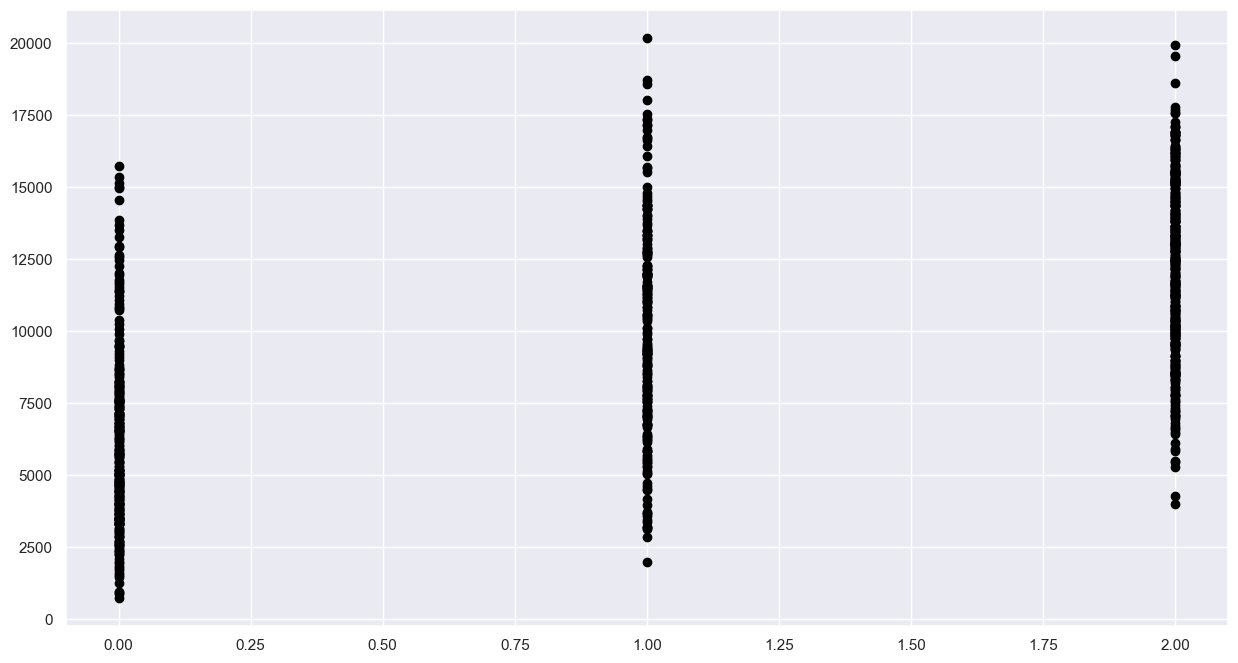

In [ ]:
#Linear regression
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
preds_Linear = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
print(preds_Linear)
# The mean squared error

mse = mean_squared_error(y_test, preds_Linear)
print("Mean squared error:", mse)
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, preds_Linear))

from sklearn.metrics import r2_score
r2 = r2_score(y_test,preds_Linear)
print("This is the R squared Test result:", r2)

# Plot outputs


# Reshape x to match the shape of y
# Assuming x and y are your original arrays
x = np.array(X_train)
x_reshaped = x.reshape((-1, 1))
y = np.array(y_train)

x = x.reshape((-1, 1))  # (-1 means infer the number of rows)
plt.scatter(x_reshaped, y, color="black")
plt.plot(x_reshaped, preds_Linear, color="blue", linewidth=3)
#
plt.xticks(())
plt.yticks(())
#
plt.show()

In [ ]:
print(y_test.shape)
print(preds_Linear.shape)


#Need to flatten dataframe, because its a column vector, not recognised 
y_test = np.array(y_test)
answers = y_test.flatten()
preds = np.array(preds_Linear)
preds = preds.flatten()

#Only series are valid
preds = pd.Series(preds)
answers = pd.Series(answers)

#result_y_predsvstest = pd.concat([y_test, preds], axis=1)

#result_y_predsvstest.head(5)

result_y_predsvstest = pd.concat([preds, answers], axis=1)
result_y_predsvstest.columns = ["Test Answers","Predicted Values"]


(219, 1)
(219, 1)


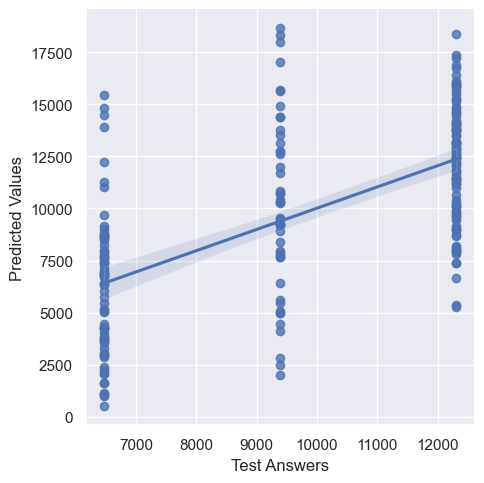

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataset with x and y columns
#sns.lineplot(x=y_test, y= preds_Linear, ci=0.95)  # 95% confidence interval

sns.lmplot(data=result_y_predsvstest, x="Test Answers", y="Predicted Values")

In [75]:
#Df total_rides, apparent_temperature_mean (°c)

rides_temp = no_strings[["total_rides","apparent_temperature_mean (°c)"]]

#print(before_X.isnull().sum())
X = rides_temp["apparent_temperature_mean (°c)"] # --> the features we will keep to build our model
y = no_strings["total_rides"] # --> what you're trying to predict

#X.info()
#y.info()
# Example:

#print(y)

X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X,y,test_size=0.2, random_state=42)

In [74]:
print(X_train_temp.shape)

(876,)


In [73]:
_Xtrain_1d = X_train_temp.flatten()

AttributeError: 'Series' object has no attribute 'flatten'

IntSlider(value=4, description='Degree', max=10, min=1)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 800x600 with 1 Axes>', 'i…

Mean squared error: 9640967.67434861
Coefficient of determination: 0.43
This is the R squared Test result: 0.43415808985446824


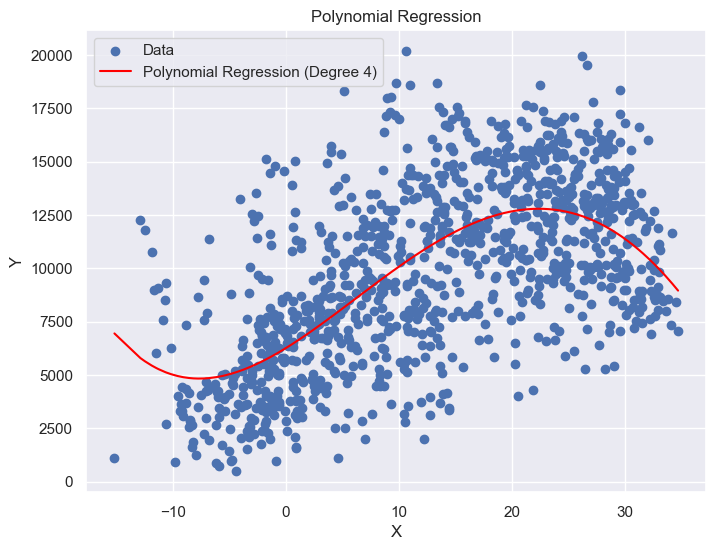

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

from sklearn.metrics import r2_score

# Generate some sample data
#np.random.seed(42)
#num_points = 20

#We need to make a df for the temperature and total rides, then do train split (X, y)
#Feed split data into polynomial reg 
#plot polynomial reg and do eval, use code in window above

#x=10*np.random.normal(0,1,num_points)
#y=10*(x**2)+np.random.normal(-400,400,num_points)




#X_train_temp = X_train_temp ###
#y_train_temp = y_train
# Function to fit and plot polynomial regression
def plot_polynomial_regression(degree):
    coefficients = np.polyfit(X, y, degree)
    polynomial = np.poly1d(coefficients)
    y_pred = polynomial(X)
    #print("Coefficients: \n", polynomial.coef_)
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label="Data")
    plt.plot(np.sort(X), y_pred[np.argsort(X)], color='red', label="Polynomial Regression (Degree {})".format(degree))
    plt.legend()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Polynomial Regression")

    #plt.show()
    #return y_pred


# Create an interactive widget for degree selection
degree_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description='Degree')

#y_pred = plot_polynomial_regression(degree_slider)

def evaluate(degree,y_pred):
    coefficients = np.polyfit(X, y, degree)
    polynomial = np.poly1d(coefficients)
    y_pred = polynomial(X)

    mse = mean_squared_error(y, y_pred)
    print("Mean squared error:", mse)

    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y, y_pred))

    r2 = r2_score(y,y_pred)
    print("This is the R squared Test result:", r2)








# Create a function to update the plot when the slider is moved
def update_plot(change):
    clear_output()
    display(degree_slider, output)
    current_y_pred = plot_polynomial_regression(degree_slider.value)
    current_degree = degree_slider.value
    evaluate(current_degree,current_y_pred)
    

degree_slider.observe(update_plot, 'value')

# The coefficients

# Create an interactive output
output = widgets.interactive_output(plot_polynomial_regression, {'degree': degree_slider})
display(degree_slider, output)
